# __Customer Churn Rate Prediction of Expresso__

### Link to the Colab Notebook:
https://colab.research.google.com/drive/1fIlc04zKpscW_lujf6rReFBxz_oNsUVk?usp=sharing

### A07 Team members:
JyunRu Huang, Kayla Huang, Ruorong Wang, Zehui Wang

## __Project Overview__

### __Introduction__
The telecommunications industry has undergone transformative evolution, with mobile network providers striving to deliver seamless connectivity and personalized services to an ever-growing customer base. Expresso, an African telecommunications company primarily operating in Mauritania and Senegal, faces challenges in managing customer retention while enhancing user satisfaction. In an era where churn—the loss of customers to competitors—can significantly impact revenue, understanding the drivers behind customer loyalty has become paramount.

### __Motivation__
Expresso faces challenges with customer churn, a critical issue in the competitive telecommunications sector. Predicting and addressing churn enables Expresso to proactively retain customers, enhance customer relationships, and maintain revenue stability. By leveraging machine learning to predict churn, Expresso can improve operational efficiency, provide personalized customer interventions, and establish itself as a data-driven organization for long-term success. This not only empowers Expresso Telecom to implement targeted retention strategies but also contributes to building a stronger, more loyal customer base in a competitive market.

### __Problem Definition__
The objective of this project is to develop a machine learning framework for predicting customer churn within Expresso's user base. By analyzing key customer metrics such as data volume, recharge frequency, and regional segmentation, we aim to identify patterns and factors contributing to churn. The project involves building, tuning, and evaluating multiple classification models, including Logistic Regression, Decision Trees, Random Forests, and Support Vector Machines, to determine the most effective predictive model.

### __Who Cares About This Problem and Why?__

- Business Leaders and Investors: Reducing churn directly impacts Expresso’s financial performance, helping decision-makers and investors focus on growth and profitability through cost-effective retention strategies.

- Customer Relationship Teams: Insights from this project enable teams to deliver personalized services, address pain points, and improve customer satisfaction through proactive engagement.

- Customers: Preventing churn ensures better service quality, tailored offers, and enhanced customer satisfaction, fostering loyalty and trust.

- Data and Technology Teams: This project leverages advanced analytics to drive innovation, improve efficiency, and align with Expresso’s strategic goals of using technology for competitive advantage.

## __Datasets Overview__

The data comes from an African telecommunications company called Expresso and was originally released as part of a machine learning competition hosted by Expresso three years ago on Zindi, a platform for data science competitions focusing on African organizations. Our dataset contains 19 columns and over 2 million rows of customer data, with data types primarily in numeric format, alongside string values for user ID, location, duration on the network, and churn status. The dependent variable, "CHURN," is binary, indicating whether a customer leaves the service.

### __Columns Description__

Both Train.csv and Test.csv dataset contains the following columns:

| Columns    | Description |
| ----------- | ----------- |
|user_id| Unique identifier for each user|
|REGION| The region where the user is located|
|TENURE| The length of time (in months) that the user has been a customer of the telecom company|
|MONTANT| The amount of money (in CFA francs) the user has paid to the company|
|FREQUENCE_RECH| The frequency at which the user recharges their phone account|
|REVENUE| The revenue generated from the user|
|ARPU_SEGMENT| Average revenue per user segment|
|FREQUENCE| The frequency of usage of the telecom services by the user|
|DATA_VOLUME| The amount of data used by the user|
|ON_NET| The number of on-net calls (calls made within the network) made by the user|
|ORANGE| The number of calls made by the user to Orange network users|
|TIGO| The number of calls made by the user to Tigo network users|
|ZONE1| The number of calls made by the user to ZONE1 network users|   
|ZONE2| The number of calls made by the user to ZONE2 network users|  
|MRG| The merger status of the user's telecom company|
|REGULARITY| The length of time (in months) between the user's first subscription and the current subscription|
|TOP_PACK| The top service package subscribed to by the user|   
|FREQ_TOP_PACK| The frequency at which the user uses the top service package|  
|CHURN| Whether or not the user has churned (1 if the user has churned, 0 otherwise)|

- Numeric Columns: Variables such as MONTANT, FREQUENCE_RECH, REVENUE, ARPU_SEGMENT, FREQUENCE, DATA_VOLUME, ON_NET, ORANGE, TIGO, ZONE1, ZONE2, REGULARITY, and FREQ_TOP_PACK should be treated as numeric because they represent continuous or discrete quantities that can be directly analyzed mathematically.
- Categorical Columns: Variables such as TENURE, REGION, MRG, and TOP_PACK should be treated as categorical since they represent distinct groups or labels rather than measurable quantities.
- CHURN is the target of our prediction.

# __1. EDA and Data Cleaning:__

In this step, we used basic EDA processes and visualizations to explore missing values, column types, and data distributions. This helped us better understand the dataset and determine appropriate data cleaning methods based on our EDA results.

__1.1 Analyzing Missing Data: Visualization of Distributions Before Imputation__

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154048 entries, 0 to 2154047
Data columns (total 19 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         object 
 1   REGION          object 
 2   TENURE          object 
 3   MONTANT         float64
 4   FREQUENCE_RECH  float64
 5   REVENUE         float64
 6   ARPU_SEGMENT    float64
 7   FREQUENCE       float64
 8   DATA_VOLUME     float64
 9   ON_NET          float64
 10  ORANGE          float64
 11  TIGO            float64
 12  ZONE1           float64
 13  ZONE2           float64
 14  MRG             object 
 15  REGULARITY      int64  
 16  TOP_PACK        object 
 17  FREQ_TOP_PACK   float64
 18  CHURN           int64  
dtypes: float64(12), int64(2), object(5)
memory usage: 312.2+ MB


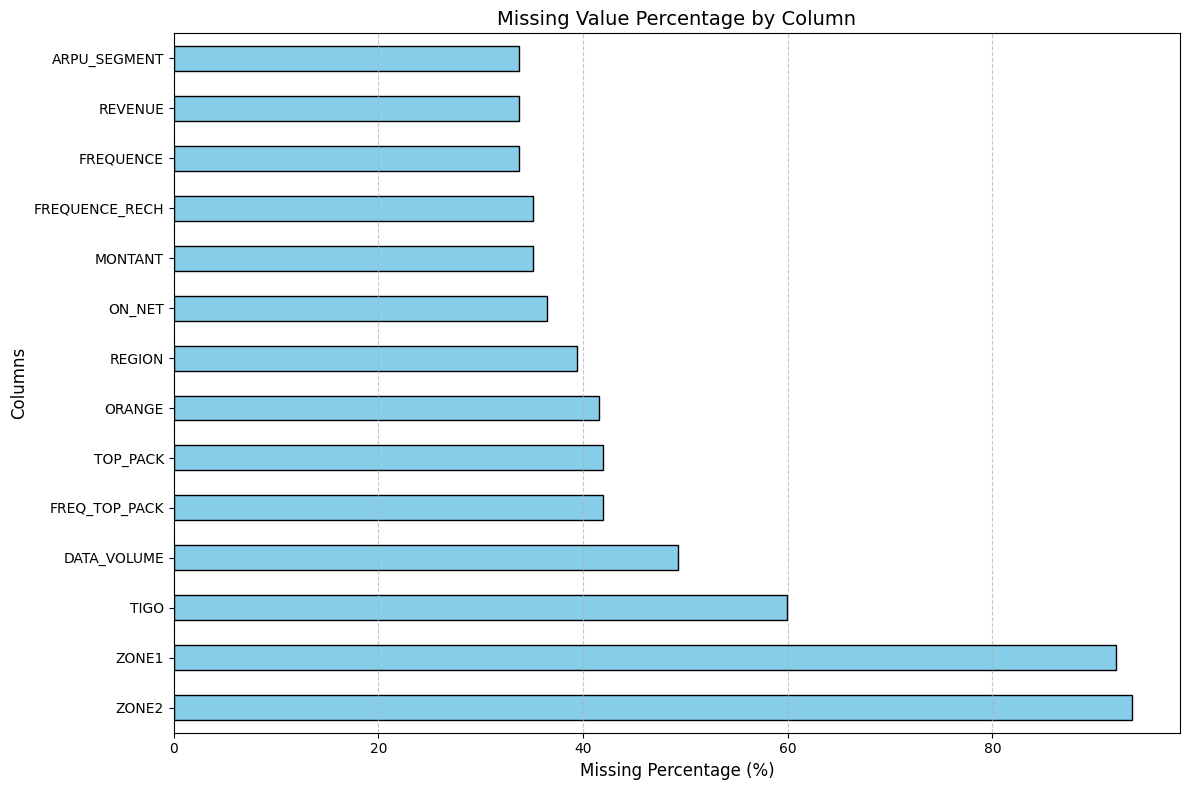

In [ ]:
import requests
import pandas as pd
import gcsfs
import matplotlib.pyplot as plt

drive_url = 'https://drive.google.com/uc?export=download&id=1GSf7g2xcXT9w2eCwC-YB03WGR94ffzUz'
response = requests.get(drive_url)
open('gcs_token.json', 'wb').write(response.content)
token_path = 'gcs_token.json'

fs = gcsfs.GCSFileSystem(token=token_path)

bucket_path = 'ba810_1024'
train = pd.read_csv(fs.open(f'gs://{bucket_path}/Train.csv'))
train.info()

missing_data = train.isnull().mean() * 100
missing_data = missing_data[missing_data > 0]
missing_data = missing_data.sort_values(ascending=False)

plt.figure(figsize=(12, 8))
missing_data.plot(kind='barh', color='skyblue', edgecolor='black')

plt.title('Missing Value Percentage by Column', fontsize=14)
plt.xlabel('Missing Percentage (%)', fontsize=12)
plt.ylabel('Columns', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

From the above printout, we can gain a basic understanding of our dataset. Given the large scale of missing values within our dataset, we decided to visualize the actual distribution of each column to determine how to treat each column differently.

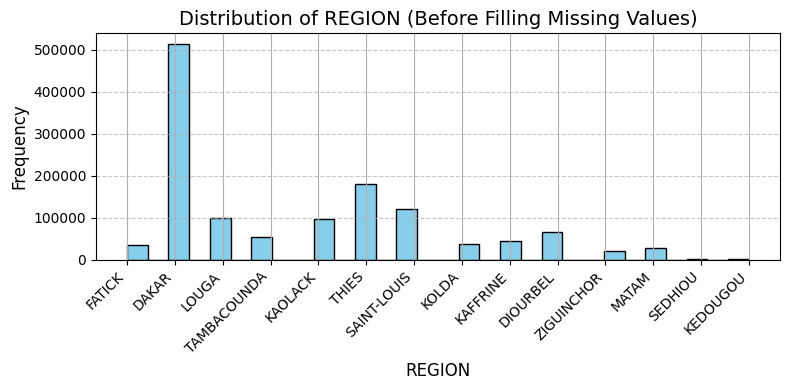

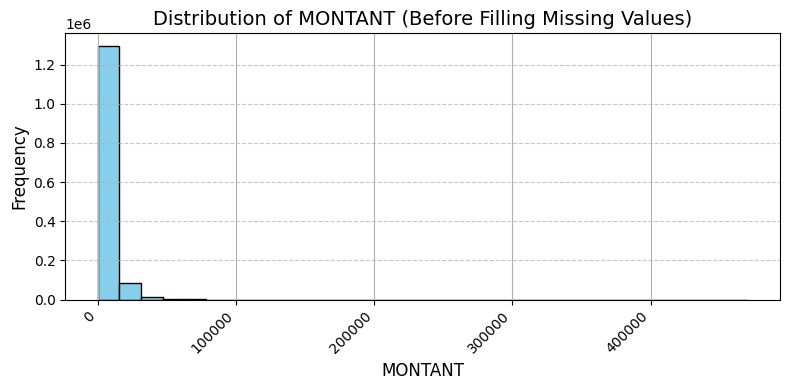

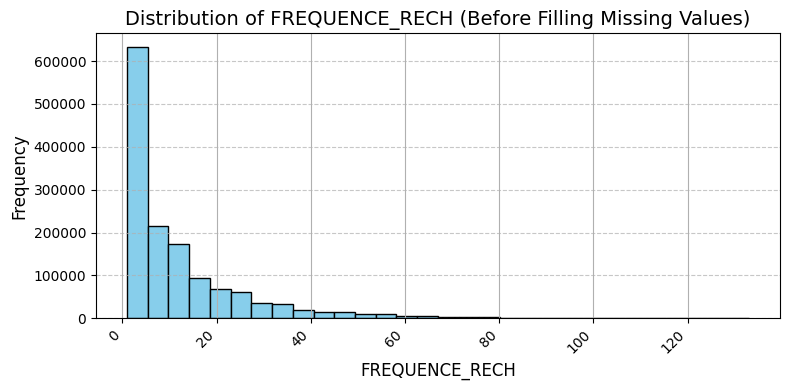

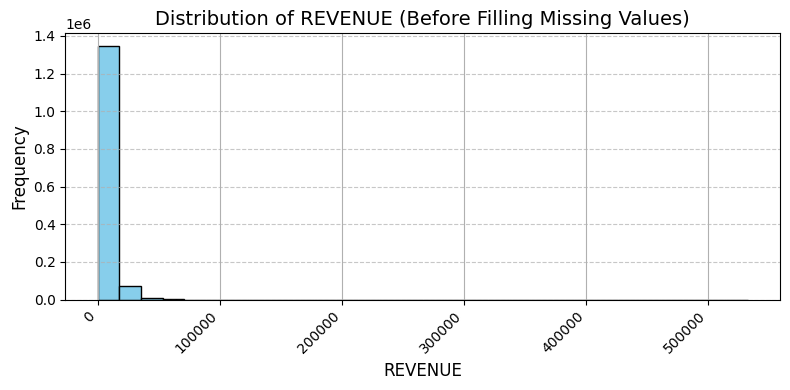

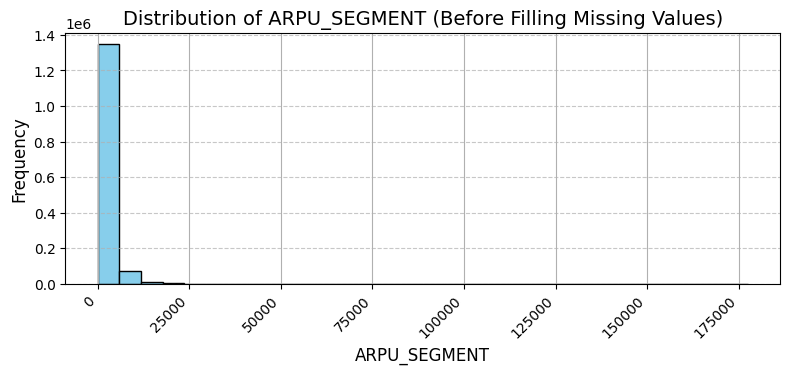

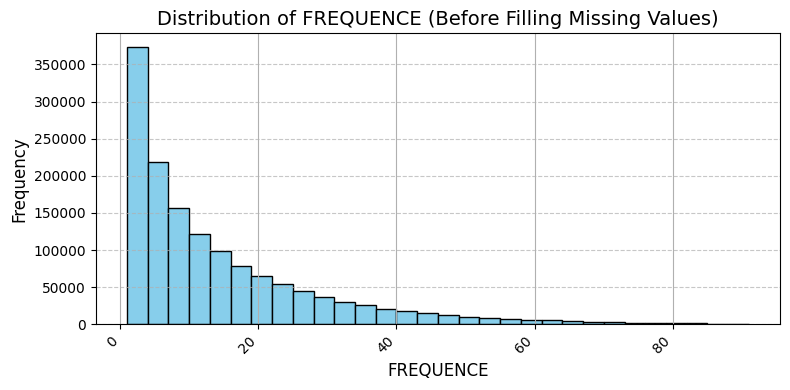

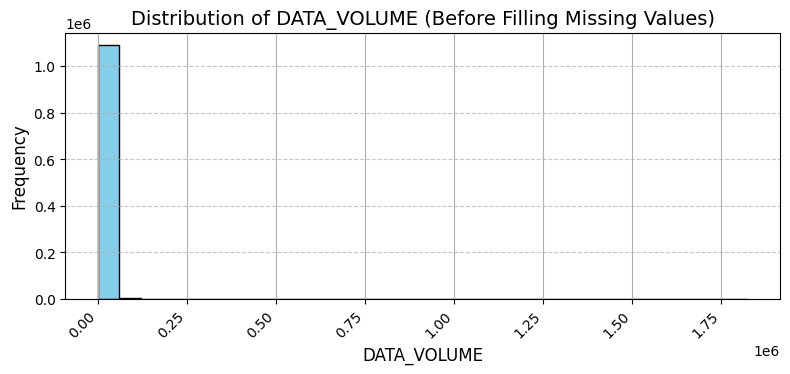

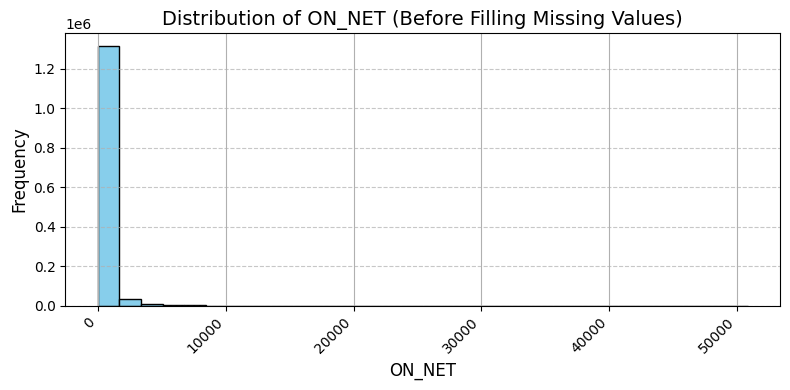

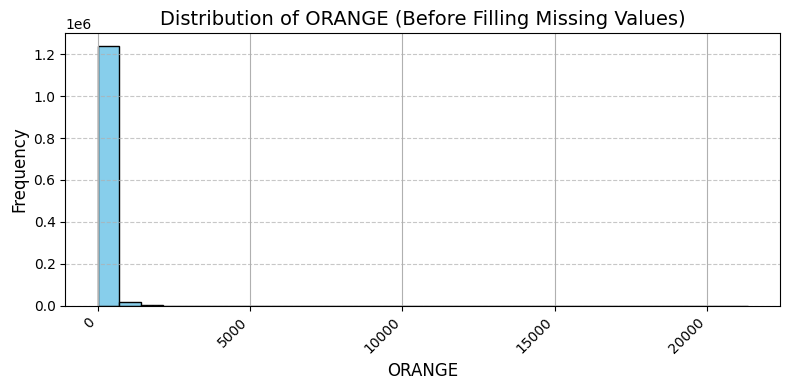

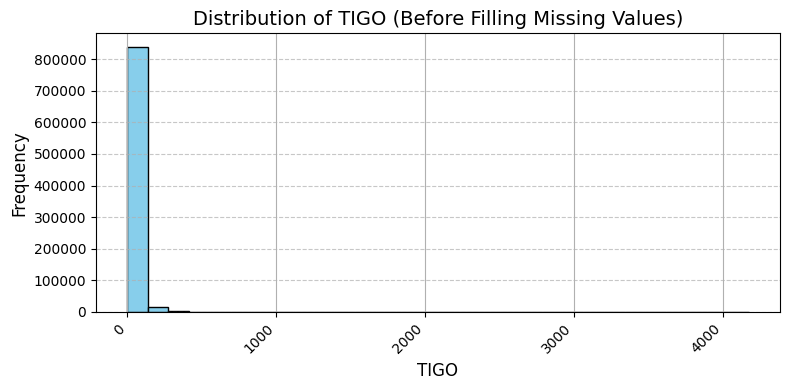

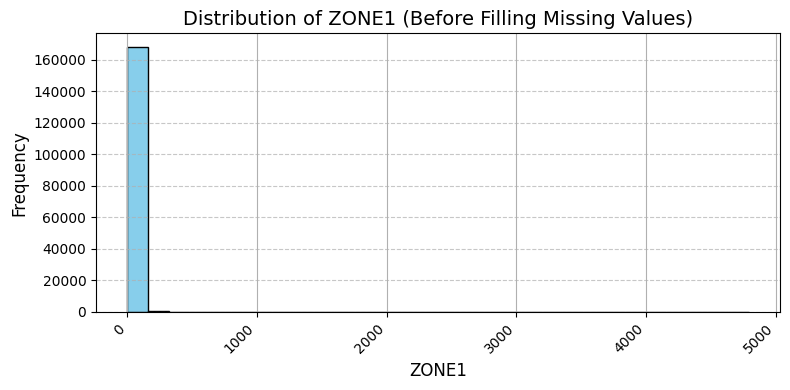

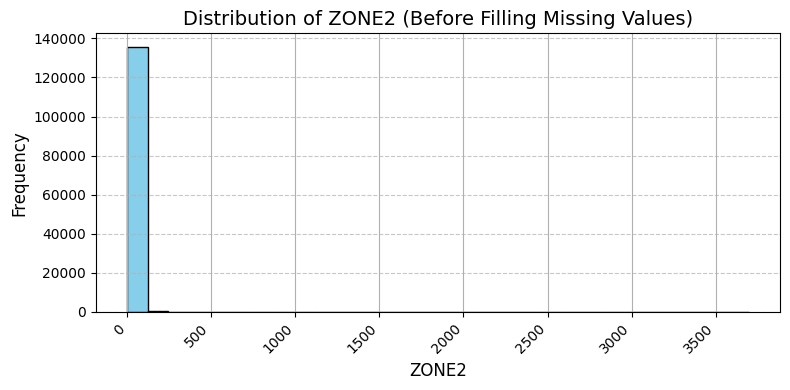

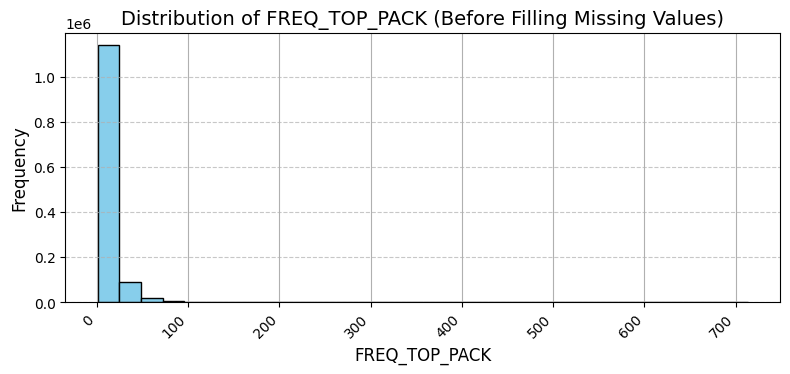

In [ ]:
missing_data = train.isnull().mean() * 100
missing_columns = missing_data[missing_data > 0].index
missing_columns = missing_columns.drop('TOP_PACK', errors='ignore')

for column in missing_columns:
    plt.figure(figsize=(8, 4))
    train[column].dropna().hist(bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column} (Before Filling Missing Values)', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

                 MONTANT  FREQUENCE_RECH   REVENUE  FREQUENCE  DATA_VOLUME  \
MONTANT         1.000000        0.792672  0.976558   0.775650     0.297847   
FREQUENCE_RECH  0.792672        1.000000  0.800284   0.956127     0.150433   
REVENUE         0.976558        0.800284  1.000000   0.785681     0.304058   
FREQUENCE       0.775650        0.956127  0.785681   1.000000     0.166603   
DATA_VOLUME     0.297847        0.150433  0.304058   0.166603     1.000000   
ON_NET          0.326999        0.404998  0.332212   0.395035    -0.013524   
ORANGE          0.658372        0.518992  0.661119   0.471881     0.063176   
TIGO            0.412611        0.343009  0.412409   0.306875     0.022689   
ZONE1           0.373342        0.119758  0.380280   0.109893     0.036299   
ZONE2           0.424086        0.133633  0.375807   0.146487     0.049496   
REGULARITY      0.522593        0.557745  0.532103   0.591324     0.182708   
FREQ_TOP_PACK   0.741021        0.868200  0.750840   0.844373   

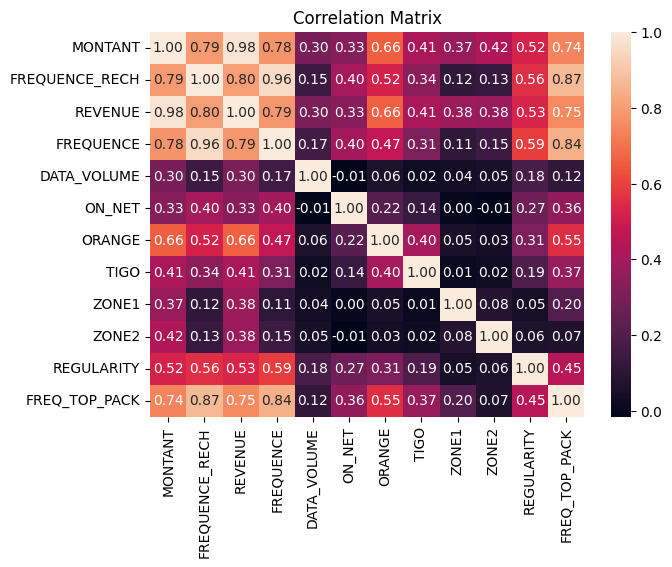

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix_column = ["MONTANT", "FREQUENCE_RECH", "REVENUE",
               "FREQUENCE", "DATA_VOLUME", "ON_NET", "ORANGE", "TIGO",
               "ZONE1", "ZONE2", "REGULARITY", "FREQ_TOP_PACK"]
correlation_matrix = train[corr_matrix_column].corr()
print(correlation_matrix)

plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cbar=True)
plt.title("Correlation Matrix")
plt.show()

From the distribution graphs above, our group decided to treat each column differently based on its distribution pattern.

1. Dropped Columns:
    - Columns: TOP_PACK, ARPU_SEGMENT.
    - We chose to drop ARPU_SEGMENT because of its unclear column definition, "average revenue per user segment." Since there was no clear description of how user segments were calculated, and the column REVENUE is already included, we decided to drop ARPU_SEGMENT.
    - We dropped TOP_Pack becuase: This is a categorical variable with a total of about 150 combinations. Initially, our team included this variable in our training dataset, but after processing it with OneHotEncoder, the number of columns in our training data inflated from 19 to nearly 170, and the data became very sparse. Given that we cannot afford robust cloud computing resources, including TOP_Pack would make the model building process very lengthy. Considering the fact that we already need to sample 10% of the data for modeling, it's impractical to further reduce our training data quantity by adding TOP_Pack. Therefore, we decided to discard this variable to ensure a smoother model building process in the end.
2. New Category Assignment:
    - REGION: Missing values were replaced with a new category labeled as 'unknown' to retain all records while acknowledging the absence of data.
3. Imputation with Zero:
    - Columns: DATA_VOLUME, ON_NET, ORANGE, TIGO, ZONE1, ZONE2.
    - These numeric columns were filled with 0, assuming the missing values indicate no usage or activity in those categories.
4. Imputation with Median:
    - Columns: MONTANT, FREQUENCE_RECH, REVENUE, FREQUENCE, FREQ_TOP_PACK.
    - Since these columns were not normally distributed and highly skewed, we decided to use the median to fill the missing values.

__1.2 Missing Value Imputation__

In [ ]:

train.drop(columns=['user_id','ARPU_SEGMENT','TOP_PACK'], inplace=True)

train['REGION'] = train['REGION'].fillna('Unknown')

train['DATA_VOLUME_NA'] = train['DATA_VOLUME'].isna().astype(int)

columns_to_fill_0 = ['DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'ZONE1', 'ZONE2']
train[columns_to_fill_0] = train[columns_to_fill_0].fillna(0)

columns_to_fill_median = ['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'FREQUENCE','FREQ_TOP_PACK']
train[columns_to_fill_median] = train[columns_to_fill_median].fillna(train[columns_to_fill_median].median())

In [ ]:
missing_values = train.isnull().sum()
print(missing_values)

REGION            0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
ZONE1             0
ZONE2             0
MRG               0
REGULARITY        0
FREQ_TOP_PACK     0
CHURN             0
DATA_VOLUME_NA    0
dtype: int64


In [ ]:
train['CHURN'].value_counts(normalize=True)

CHURN
0    0.812453
1    0.187547
Name: proportion, dtype: float64

After implementing our data cleaning and imputation strategies, our data was successfully cleaned. We then printed out the distribution of our dependent variable, CHURN, to better understand our data. As shown above, the data is highly imbalanced, which may pose a challenge to our modeling in later steps.

# **__2. Data Preprocssing: Split, Prepipeline, Transformation, and Feature Selection__**

__2.1 Data Transformation and Splitting for Machine Learning__

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

train_sample = train.sample(frac=0.1, random_state=99)

X = train_sample.drop('CHURN', axis=1)
y = train_sample ['CHURN'].copy()

cat_pipeline = Pipeline([
    ('cat_encoder', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='infrequent_if_exist'))
])
num_pipeline = Pipeline([
    ('num_scaler', StandardScaler())
])


cat_attribs = ["TENURE","REGION", "MRG"]
num_attribs = [ "MONTANT", "FREQUENCE_RECH", "REVENUE",
               "FREQUENCE", "DATA_VOLUME", "ON_NET", "ORANGE", "TIGO",
               "ZONE1", "ZONE2", "REGULARITY", "FREQ_TOP_PACK"]


X[cat_attribs] = X[cat_attribs].astype(str)


prep_pipeline = ColumnTransformer([
    ('cat', cat_pipeline, cat_attribs),
    ('num', num_pipeline, num_attribs)
], remainder='passthrough')

X = prep_pipeline.fit_transform(X)

feature_names = prep_pipeline.get_feature_names_out()
X = pd.DataFrame(X, columns=feature_names)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, stratify=y,random_state=99) #split all
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((172324, 34), (43081, 34), (172324,), (43081,))

The above steps help prepare our data for modeling. After importing the necessary libraries, we randomly selected 10% of our dataset from the training data to create a smaller subset called train_sample for faster processing. We then split the dataset into features (X) and the target variable (y), removing CHURN from X and assigning it to y.

We defined our categorical and numerical columns, using OneHotEncoder for categorical columns and StandardScaler for numerical columns. The OneHotEncoder converted categorical columns into multiple binary columns, one for each category. By setting drop='first', the code reduces the number of binary columns by one to avoid multicollinearity. This is necessary because we plan to try different models on our dataset, and not all of them are tree-based models. The StandardScaler standardizes numerical features to have a mean of 0 and a standard deviation of 1, which helps improve model performance.

After applying the pipeline and converting the data into a DataFrame, we split the data into training and testing datasets and printed their shapes to ensure the split was successful.

 __2.2 Features Selection: Univariate Feature Selection__

In this step, we applied feature selection to remove redundant and less relevant features, focusing on the most important ones. This allows us to simplify our model, use less computational power, and reduce noise. Considering that we have a relatively large dataset but limited computing power, we started with Univariate Selection for quick processing. Below are the code and output for Univariate feature selection.

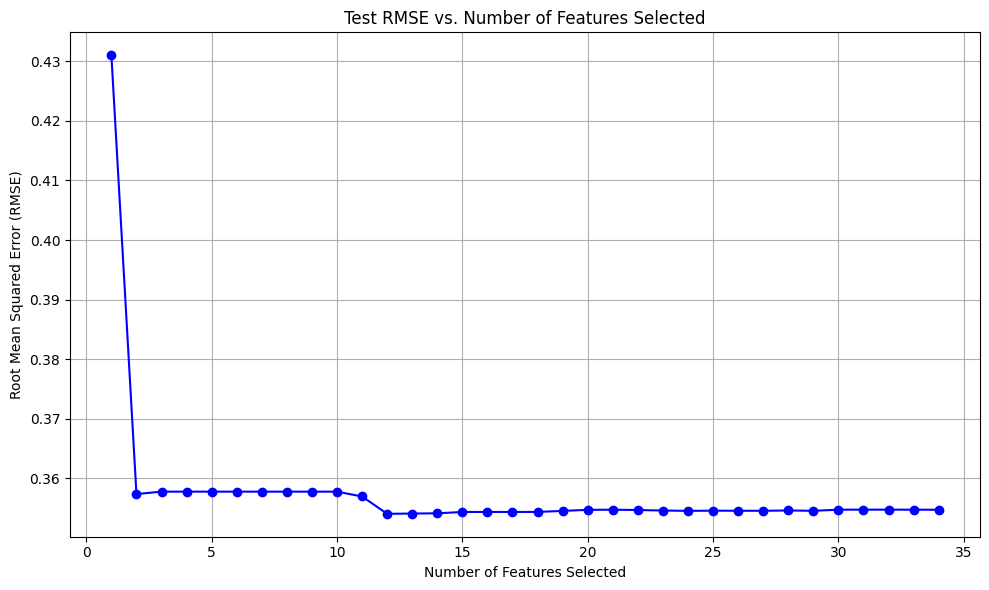

,Number of Features Selected,mean_test_rmse
11,12,0.354074
12,13,0.354115
13,14,0.354156
14,15,0.354377
15,16,0.354385
16,17,0.354385
17,18,0.354385
18,19,0.354557
23,24,0.354565
28,29,0.354574



The selected features are: ['cat__REGION_DIOURBEL', 'cat__REGION_KAFFRINE', 'cat__REGION_KAOLACK', 'cat__REGION_KOLDA', 'cat__REGION_LOUGA', 'cat__REGION_SAINT-LOUIS', 'cat__REGION_TAMBACOUNDA', 'cat__REGION_THIES', 'cat__REGION_Unknown', 'num__FREQUENCE', 'num__REGULARITY', 'remainder__DATA_VOLUME_NA']
Test RMSE: 0.3494


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

uni_pipeline = Pipeline([
    ('prep', MinMaxScaler()),
    ('select', SelectKBest(score_func=chi2)),
    ('model', LogisticRegression(random_state=99))
    ])


param_grid = {
    'select__k': range(1, X_train.shape[1] + 1)
    }

grid_search = GridSearchCV(uni_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

cv_res = pd.DataFrame(grid_search.cv_results_)

cv_res['mean_test_rmse'] = (-cv_res['mean_test_score'])**0.5

plt.figure(figsize=(10, 6))
plt.plot(cv_res['param_select__k'], cv_res['mean_test_rmse'], marker='o', linestyle='-', color='b')
plt.xlabel("Number of Features Selected")
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.title("Test RMSE vs. Number of Features Selected")
plt.grid(True)
plt.tight_layout()
plt.show()

cv_res = cv_res.rename(columns={"param_select__k": "Number of Features Selected"})

display(cv_res.sort_values(by="mean_test_rmse")
        .filter(regex='(^Number of Features Selected|mean_test_rmse)', axis=1))

best_model = grid_search.best_estimator_

selected = best_model['select'].get_support()
selected_features = X_train.columns[selected]
print(f'\nThe selected features are: {selected_features.tolist()}')

y_pred = best_model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Test RMSE: {test_rmse:.4f}')


The visualization illustrates the relationship between Root Mean Square Error (RMSE) and the number of features selected during Univariate feature selection. A significant drop in RMSE is observed as the number of features increases initially, with noticeable improvement up to around 12 features. Beyond this point, the RMSE stabilizes, with only marginal differences observed as additional features are included. This indicates that selecting more than 12 features does not meaningfully enhance the model's performance, suggesting that these features are sufficient for optimal results. Therefore, we chose to use the 12 selected features to balance model accuracy and computational efficiency.

In addition to Univariate feature selection, we also applied the LASSO method, Recursive Feature Elimination, and Backward Stepwise methods for feature selection, as these were covered in class practice. However, the results of these methods did not outperform those of Univariate feature selection. Therefore, we decided to use Univariate feature selection as our primary method. For better organization and readability of our notebook, we included the codes and results of the other methods in Appendix 1.

## __3. Model Training:__

__3.1 Logistic Regression__

Logistic Regression assumes linear relationships between features and the target variable. While it may struggle with correlated features (like MONTANT and REVENUE), it provides a baseline for interpreting the effects of individual features on churn.

__3.1.1 Logistic Regression Model Training and Evaluation__

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report, balanced_accuracy_score

selected_features = [
    'cat__REGION_DIOURBEL', 'cat__REGION_KAFFRINE', 'cat__REGION_KAOLACK',
    'cat__REGION_KOLDA', 'cat__REGION_LOUGA', 'cat__REGION_SAINT-LOUIS',
    'cat__REGION_TAMBACOUNDA', 'cat__REGION_THIES', 'cat__REGION_Unknown',
    'num__FREQUENCE', 'num__REGULARITY', 'remainder__DATA_VOLUME_NA'
]

X_train = X_train[selected_features]
X_test = X_test[selected_features]

logistic_model = LogisticRegression(random_state=99, max_iter=1000)

logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\nEvaluation Metrics on Test Set:")
print(f"General Accuracy: {accuracy:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Evaluation Metrics on Test Set:
General Accuracy: 0.8779
Balanced Accuracy: 0.8264
Precision: 0.6496
Recall: 0.7445
ROC-AUC: 0.9289

Confusion Matrix:
[[31864  3214]
 [ 2045  5958]]


__3.1.2 Grid Search for Hyperparameter Tuning__

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'solver': ['liblinear', 'lbfgs'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l2'],
    'class_weight': [None, 'balanced']
}

grid_search = GridSearchCV(
    estimator=logistic_model,
    param_grid=param_grid,
    scoring='balanced_accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best parameters from grid search:")
print(grid_search.best_params_)
print(f"Best ROC-AUC score from grid search: {grid_search.best_score_:.4f}")

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\nEvaluation Metrics on Test Set:")
print(f"General Accuracy: {accuracy:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Best parameters from grid search:
{'C': 0.001, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
Best ROC-AUC score from grid search: 0.8578

Evaluation Metrics on Test Set:
General Accuracy: 0.8322
Balanced Accuracy: 0.8634
Precision: 0.5280
Recall: 0.9129
ROC-AUC: 0.9292

Confusion Matrix:
[[28548  6530]
 [  697  7306]]


We used grid search to tune our Logistic Regression model. The model achieves a high recall (91.29%), effectively identifying most churned customers, which is critical for churn prediction as missing churned customers can be costly for the business. A strong ROC-AUC score (92.92%) also indicates excellent discriminatory power. However, Precision (52.80%) is relatively low, indicating that many customers predicted to churn actually do not, leading to potential inefficiencies in targeting retention efforts.

__3.2 Decision Tree__

Decision Tree: Decision Trees handle non-linear relationships and are robust to multicollinearity. This makes them particularly useful for understanding the interactions between highly correlated features, such as FREQUENCE_RECH and FREQUENCE, and their collective impact on churn.

__3.2.1 Baseline Decision Tree Model: Training and Evaluation__

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.tree import plot_tree
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\nEvaluation Metrics on Test Set:")
print(f"General Accuracy: {accuracy:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Evaluation Metrics on Test Set:
General Accuracy: 0.8798
Balanced Accuracy: 0.7946
Precision: 0.6828
Recall: 0.6591
ROC-AUC: 0.9292

Confusion Matrix:
[[32627  2451]
 [ 2728  5275]]



__3.2.2 Randomized Search for Hyperparameter Tuning in Decision Tree__

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.tree import plot_tree
from sklearn.model_selection import RandomizedSearchCV
import numpy as np


param_dist = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': list(range(2, 7)),
    'min_samples_split': range(2, 101),
    'min_samples_leaf': range(3, 101),
    'max_features': [None],
    'class_weight': ['balanced']
}

clf = DecisionTreeClassifier()

random_search = RandomizedSearchCV(
    estimator=clf,
    param_distributions=param_dist,
    n_iter=50,
    scoring='balanced_accuracy',
    cv=5,
    random_state=99,
    n_jobs=4,
    verbose=1
)

random_search.fit(X_train, y_train)

print("Best parameter combination:")
print(random_search.best_params_)

best_clf = random_search.best_estimator_

y_pred = best_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\nEvaluation Metrics on Test Set:")
print(f"General Accuracy: {accuracy:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(30, 10), dpi=600)
plot_tree(best_clf, filled=True, feature_names=list(X_train.columns));
plt.show()


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameter combination:
{'splitter': 'best', 'min_samples_split': 12, 'min_samples_leaf': 36, 'max_features': None, 'max_depth': 5, 'criterion': 'gini', 'class_weight': 'balanced'}

Evaluation Metrics on Test Set:
General Accuracy: 0.8277
Balanced Accuracy: 0.8654
Precision: 0.5203
Recall: 0.9255
ROC-AUC: 0.9289

Confusion Matrix:
[[28250  6828]
 [  596  7407]]


After tuning our decision tree model using random search, we achieved a high recall (92.55%) and balanced accuracy (86.54%), demonstrating the model's effectiveness in identifying churned customers and maintaining strong performance across both classes. This reduces the risk of missing at-risk customers, which is critical in churn prediction. However, the model exhibits a relatively low precision (52.03%), meaning that a significant number of non-churned customers are incorrectly predicted as churned. This could lead to inefficiencies in retention efforts and increased operational costs. Despite this, prioritizing recall over precision is a reasonable approach for churn prediction, as missing churned customers often results in greater financial loss than targeting non-churned ones.

High recall is particularly important in churn prediction because it ensures that the majority of at-risk customers are identified, allowing the business to take proactive measures such as targeted retention campaigns, discounts, or personalized offers. Missing churned customers can result in significant revenue loss. Therefore, even if some non-churned customers are incorrectly targeted, the cost of false positives is often outweighed by the long-term benefits of reducing churn and maintaining customer loyalty. Therefore, the high recall with the tuned decision tree model is very helpful to our churn rate prediction.

__3.2.3 Pruned Decision Tree Model for Prediction__


Evaluation Metrics on Test Set:
General Accuracy: 0.8387
Balanced Accuracy: 0.8631
Precision: 0.5393
Recall: 0.9019
ROC-AUC: 0.9289

Confusion Matrix:
[[28912  6166]
 [  785  7218]]


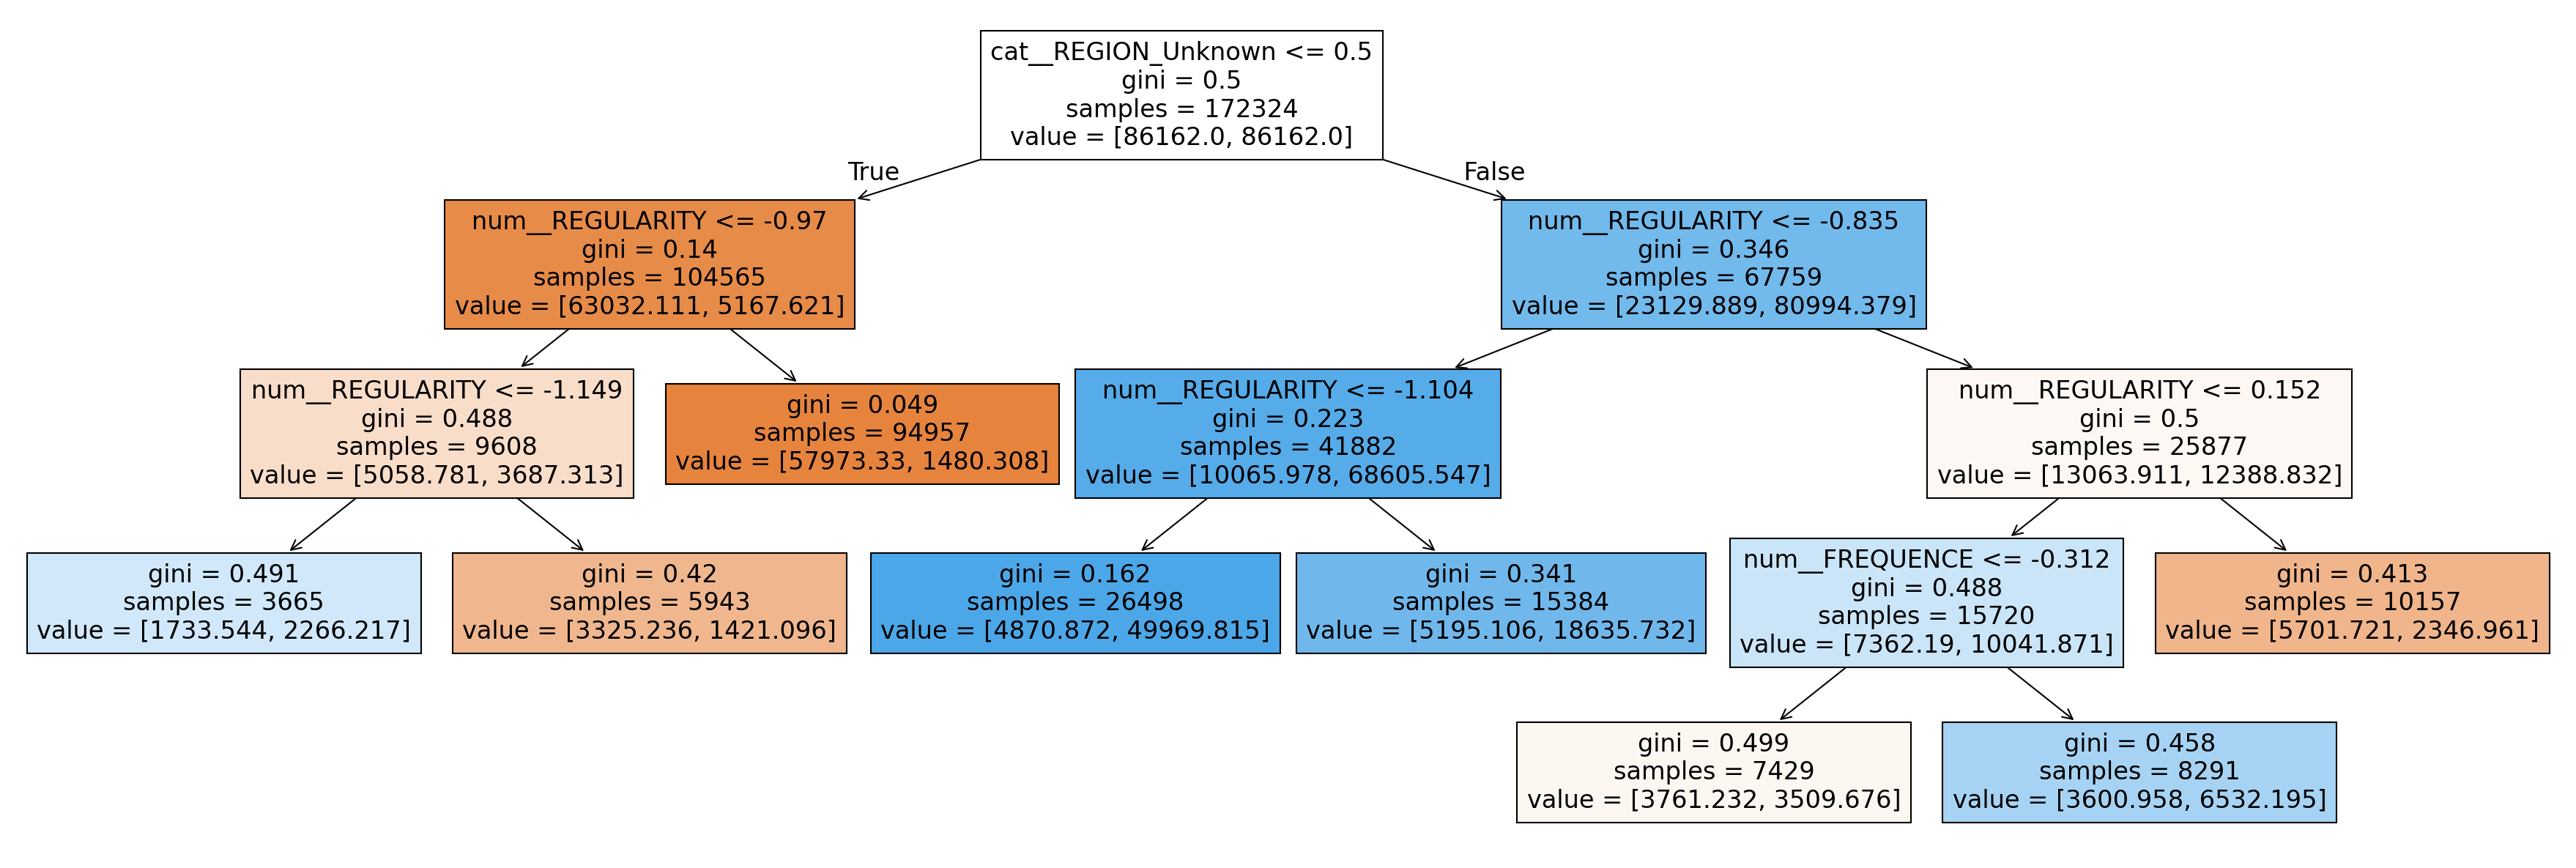

In [ ]:
prune_params = {'splitter': 'best',
                'min_samples_split': 12,
                'min_samples_leaf': 36,
                'max_features': None,
                'max_depth': 5,
                'criterion': 'gini',
                'class_weight': 'balanced',
               'ccp_alpha': 0.001}

clf = DecisionTreeClassifier(**prune_params)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\nEvaluation Metrics on Test Set:")
print(f"General Accuracy: {accuracy:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


plt.figure(figsize=(30, 10), dpi=150)
plot_tree(clf, filled=True, feature_names=list(X_train.columns));
plt.show()

We applied pruning to simplify the decision tree model by reducing unnecessary branches, improving generalization, and focusing on the most relevant splits. After pruning, the model demonstrated slightly improved precision compared to the random search-tuned tree, resulting in fewer false positives and more accurate predictions of churn. It also retained a high ability to distinguish between churned and non-churned customers, as reflected in its consistent ROC-AUC score. However, despite the improved precision, the number of non-churned customers incorrectly classified as churned remains significant, potentially leading to inefficient retention efforts. Additionally, the model exhibits a trade-off between recall and precision, with a slight decrease in recall as the model favors a more balanced approach.

__3.3 Random Forest__

Random Forest is highly effective in mitigating the impact of multicollinearity and overfitting. It can identify the most important features (e.g., among correlated pairs like REVENUE and MONTANT) while leveraging interactions to improve churn predictions.

__3.3.1 Baseline Random Forest Model: Training and Evaluation__

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, precision_score, recall_score

rf_pipeline = Pipeline([
    ('classifier', RandomForestClassifier(random_state=99))
])

rf_pipeline.fit(X_train, y_train)

y_pred = rf_pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\nEvaluation Metrics on Test Set:")
print(f"General Accuracy: {accuracy:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Evaluation Metrics on Test Set:
General Accuracy: 0.8797
Balanced Accuracy: 0.7948
Precision: 0.6821
Recall: 0.6598
ROC-AUC: 0.9289

Confusion Matrix:
[[32617  2461]
 [ 2723  5280]]



__3.3.2 Random Search Hyperparameter Optimization for Random Forest__

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, classification_report
from scipy.stats import randint

rf = RandomForestClassifier(random_state=99)

param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(10, 30),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False],
}

random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=50,
    cv=3,
    verbose=2,
    random_state=99,
    scoring='balanced_accuracy',
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("Best parameters found: ", random_search.best_params_)

y_pred = random_search.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\nEvaluation Metrics on Test Set:")
print(f"General Accuracy: {accuracy:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/opt/conda/lib/python3.10/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters found:  {'bootstrap': True, 'max_depth': 17, 'max_features': 'log2', 'min_samples_leaf': 7, 'min_samples_split': 13, 'n_estimators': 124}

Evaluation Metrics on Test Set:
General Accuracy: 0.8813
Balanced Accuracy: 0.7950
Precision: 0.6892
Recall: 0.6576
ROC-AUC: 0.9289

Confusion Matrix:
[[32705  2373]
 [ 2740  5263]]
[CV] END bootstrap=False, max_depth=12, max_features=sqrt, min_samples_leaf=13, min_samples_split=10, n_estimators=120; total time=  16.1s
[CV] END bootstrap=False, max_depth=25, max_features=log2, min_samples_leaf=4, min_samples_split=7, n_estimators=752; total time= 1.8min
[CV] END bootstrap=False, max_depth=19, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=145; total time=  21.2s
[CV] END bootstrap=False, max_depth=15, max_features=log2, min_samples_leaf=11, min_samples_split=7, n_estimators=260; total time=  36.1s
[CV] END bootstrap=False, max_depth=17, max_features=log2, min_samples_leaf=17, min_samples_split=16, n_estimato

We used random search to tune the Random Forest model, achieving a high precision (68.92%), which minimizes false positives and enhances the efficiency of retention campaigns by focusing on a smaller, more accurate group of customers likely to churn. Additionally, the model demonstrated strong general accuracy (88.13%), highlighting its overall reliability for churn prediction. However, the model's low recall (65.76%) indicates that a significant number of churned customers are not identified, potentially leading to revenue loss as some at-risk customers may not be targeted for retention efforts.

__3.4 SVM__

SVM is well-suited for binary classification tasks, especially with imbalanced datasets, as it finds the optimal hyperplane to maximize class separation.

__3.4.1 SVM Model Training and Evaluation__

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, precision_score, recall_score

svm_model = SVC()

svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\nEvaluation Metrics on Test Set:")
print(f"General Accuracy: {accuracy:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Evaluation Metrics on Test Set:
General Accuracy: 0.8801
Balanced Accuracy: 0.7945
Precision: 0.6843
Recall: 0.6583
ROC-AUC: 0.9289

Confusion Matrix:
[[32648  2430]
 [ 2735  5268]]


__3.4.2 Hyperparameter Tuning with HalvingGridSearchCV__

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.svm import SVC

svm_model = SVC(random_state=99)

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]
}

halving_search = HalvingGridSearchCV(
    estimator=svm_model,
    param_grid=param_grid,
    scoring='balanced_accuracy',
    cv=3,
    factor=2,
    verbose=1
)

halving_search.fit(X_train, y_train)

print("Best Parameters:", halving_search.best_params_)
print(f"Best Accuracy: {halving_search.best_score_:.4f}")

n_iterations: 7
n_required_iterations: 7
n_possible_iterations: 7
min_resources_: 2692
max_resources_: 172324
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 72
n_resources: 2692
Fitting 3 folds for each of 72 candidates, totalling 216 fits
----------
iter: 1
n_candidates: 36
n_resources: 5384
Fitting 3 folds for each of 36 candidates, totalling 108 fits
----------
iter: 2
n_candidates: 18
n_resources: 10768
Fitting 3 folds for each of 18 candidates, totalling 54 fits
----------
iter: 3
n_candidates: 9
n_resources: 21536
Fitting 3 folds for each of 9 candidates, totalling 27 fits
----------
iter: 4
n_candidates: 5
n_resources: 43072
Fitting 3 folds for each of 5 candidates, totalling 15 fits
----------
iter: 5
n_candidates: 3
n_resources: 86144
Fitting 3 folds for each of 3 candidates, totalling 9 fits
----------
iter: 6
n_candidates: 2
n_resources: 172288
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best Parameters: {'C': 100, 'degree': 2, 'gamma

Due to the limited computational power available, we used halving grid search instead of grid search to tune our SVM model.

__3.4.3 Final Model Evaluation with Best Parameters__

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, precision_score, recall_score

best_svm = SVC(C=100, degree=2, gamma='scale', kernel='linear', probability=True)

best_svm.fit(X_train, y_train)

y_pred = best_svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\nEvaluation Metrics on Test Set:")
print(f"General Accuracy: {accuracy:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Evaluation Metrics on Test Set:
General Accuracy: 0.8727
Balanced Accuracy: 0.8405
Precision: 0.6245
Recall: 0.7892
ROC-AUC: 0.9289

Confusion Matrix:
[[31281  3797]
 [ 1687  6316]]


After tuning the SVM model with halving grid search, we achieved a balanced accuracy of 84.05%, a high ROC-AUC of 92.89%, and a recall of 78.92%. These results indicate that the model effectively distinguishes between churned and non-churned customers, correctly identifying a significant portion of at-risk customers and minimizing the risk of missed churn cases. However, the model achieved a moderate precision of 62.45%, meaning a substantial number of non-churned customers were misclassified as churned, potentially leading to inefficiencies and increased costs in retention efforts.

__3.5 Stacking__

We also used stacking to combine the strengths of multiple base models to improve predictive accuracy, leveraging the diversity of individual models to address complex patterns in the data.

In [ ]:
!pip install xgboost

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, precision_score, recall_score

stacking_clf = StackingClassifier(
    estimators=[
        ('lr', LogisticRegression(
            random_state=99,
            solver='liblinear',
            class_weight='balanced',
            C=0.001,
            penalty='l2',
            max_iter=100
        )),
        ('dt', DecisionTreeClassifier(
            splitter='best',
            min_samples_split=12,
            min_samples_leaf=36,
            max_features=None,
            max_depth=5,
            criterion='gini',
            class_weight='balanced',
            ccp_alpha=0.001,
            random_state=99
        )),
        ('rfc', RandomForestClassifier(
            bootstrap=True,
            max_depth=17,
            max_features='log2',
            min_samples_leaf=7,
            min_samples_split=13,
            n_estimators=124,
            random_state=99,
            n_jobs=-1
        )),
        ('svc', SVC(
            C=100,
            degree=2,
            gamma='scale',
            kernel='linear',
            probability=True
        ))
    ],
    passthrough=True,
    final_estimator=XGBClassifier(random_state=99,
                                  scale_pos_weight= (sum(y_train == 0) / (sum(y_train == 1))),
                                  n_jobs=-1),
    cv=5
    )

stacking_clf.fit(X_train, y_train)


y_pred = stacking_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"General Accuracy: {accuracy:.4f}")

balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

precision = precision_score(y_test, y_pred, average='binary')
print(f"Precision: {precision}")
recall = recall_score(y_test, y_pred, average='binary')
print(f"recall: {recall}")

General Accuracy: 0.8361
Balanced Accuracy: 0.8656
Confusion Matrix:
[[28720  6358]
 [  701  7302]]
Precision: 0.5345534407027819
recall: 0.9124078470573534


The stacking model combines the four individual models, leveraging their strengths to balance out their weaknesses. With stacking, we achieved a high recall (91.24%) and balanced accuracy (86.56%), demonstrating the model’s ability to capture the vast majority of churned customers across both classes, significantly reducing the risk of missing at-risk individuals. However, the model's limitation lies in its relatively low precision (53.46%), indicating a high rate of false positive predictions, which could lead to inefficiencies in retention efforts.

## __Recommendations:__

The churn rate of customers is what telecom companies care about the most. All of the machine learning models we use perform quite well in this area, but their performance in terms of recall and precision rates varies significantly. In predicting churn rate, the recall rate (the percentage of actual churned customers identified by the model) is more important than the precision rate. This is because if telecom companies can detect potential churners in advance, they have many resources to retain these customers, such as marketing campaigns and discounts. For those loyal customers, even if telecom companies mistakenly label them as potential churners and provide several benefits to them, these customers will likely remain with the company, making no difference in their loyalty.

Therefore, when developing a model to predict the churn rate of telecom customers, the focus should be on improving the recall rate. By constructing decision trees, we have already identified that the frequency of telecom service usage and the duration of user subscriptions are significant variables. To further deepen the analysis, time series analysis can be performed to examine changes in user behavior, or direct feedback from customers who chose to churn out could be incorporated. This could help build a churn prediction model with a higher recall rate.

## __Conclusion:__


| Model                          | Accuracy | Balanced Accuracy | Precision | Recall  |
|--------------------------------|----------|-------------------|-----------|---------|
| **Base Model**                 |          |                   |           |         |
| Logistic                       | 0.8779   | 0.8264            | 0.6496    | 0.7445  |
| Decision Tree                  | 0.8798   | 0.7946            | 0.6828    | 0.6591  |
| Random Forest                  | 0.8797   | 0.7948            | 0.6821    | 0.6598  |
| SVM                            | 0.8801   | 0.7945            | 0.6843    | 0.6583  |
| **Tuning**                     |          |                   |           |         |
| Logistic Regression            | 0.8332   | 0.8634            | 0.528     | 0.9129  |
| Decision Tree (Before Pruning) | 0.8277   | 0.8654            | 0.5203    | 0.9255  |
| Decision Tree (After Pruning)  | 0.8387   | 0.8631            | 0.5393    | 0.9019  |
| Random Forest                  | 0.8813   | 0.7950            | 0.6892    | 0.6576  |
| SVM                            | 0.8727   | 0.8405            | 0.6245    | 0.7892  |
| **Stacking**                   |          |                   |           |         |
| (Final Estimator - XGBoost)    | 0.8366   | 0.8661            | 0.5352    | 0.9131  |


In our initial planning, we anticipated that the stacking method would yield the most comprehensive model. However, our training focused on achieving a balanced score, and the results revealed that while the stacking method definitely found the model with the highest balanced accuracy score, it only made slight improvements compared to the other four original models. Additionally, the recall rate is the core evaluation score in our scenario. Our simpler model—the decision tree—delivered a similarly good recall rate performance as the stacking method did, but with far less computing time.

After this final evaluation, the project highlighted a key insight for our group: in the realm of machine learning, more complex models don't necessarily produce better outcomes. The increase in computational effort does not correlate with substantial improvements in output. For our project, a straightforward and appropriate model like the decision tree proved to be the optimal choice, yielding a good enough recall rate.

## __Challenges:__

### __Limitation of Computational Resources__

One of the notable challenges we encountered during this project was the limitation of computational resources, particularly given the size of the dataset. At the start of our team project, we realized that the basic Colab environment could not meet our computational requirements. Consequently, we set up a virtual machine on Google Cloud with 4 CPUs and 8 GB of RAM.

As the project progressed, the demands of training and hyperparameter optimization for these models required significant processing power and memory. To address this issue, we upgraded our machine twice, eventually utilizing a virtual machine with 16 CPUs and 64 GB of RAM. However, even with such robust settings, running machine learning models on our data remained challenging, especially for the SVM model and stacking methods. The table below illustrates the average runtime per training session:

| Models    | Average Running Time for Base Model | Average Running Time for Hyperparameter Tuning Model|
| ----------- | ----------- | ----------- |
|Logistic Regression| <1s | 30s |
|Decision Tree| 5s | 1 Min |
|Random Forest| 30s | 15 Min |
|SVM| 15 Min | 3 Hr |
|Stacking| 3 Hr | N/A (Virtual Machine Crash) |

Collaboration was a key aspect of overcoming these challenges. Our team divided the workload strategically, assigning different members to run specific models simultaneously in separate instances. This parallel processing approach not only optimized time but also ensured that we could experiment with various machine learning techniques without overwhelming a single resource.

### __Class Imbalance__

In [ ]:
train['CHURN'].value_counts(normalize=True)

CHURN
0    0.812453
1    0.187547
Name: proportion, dtype: float64


As shown above, our predicted variable - CHURN rate - has an imbalanced distribution. Since the imbalance is moderate, we opted to use a balanced score across all four models during hyperparameter tuning to select the best model. Considering that the class imbalance in our dataset is not extreme and given our time constraints, we decided to focus on the overall machine learning development process. Therefore, instead of using sampling with replacement to equalize class sizes, we chose to retain the dataset in its original form.

## __Generative AI disclosure statement__

In completing this project, we utilized Generative AI tools to assist with various aspects of our work. Below is a detailed account of how these tools were applied:

- Content Generation: We used ChatGPT to brainstorm ideas for handling missing values, selecting feature selection methods, and identifying key metrics for model evaluation. Additionally, we sought assistance in explaining complex concepts such as pruning and hyperparameter tuning in an accessible manner.

- Code Review and Debugging: ChatGPT was instrumental in reviewing and optimizing our Python code for data preprocessing, feature selection, and model tuning. It helped improve efficiency, resolve errors, and suggest alternative approaches for hyperparameter tuning and model evaluation.

- Proofreading and Grammar Checks: We employed ChatGPT to refine our written explanations, ensuring clarity, readability, and grammatical accuracy throughout our documentation.

Our team has thoroughly reviewed, edited, and validated all AI-generated content to ensure its accuracy, relevance, and originality in accordance with academic integrity guidelines.

## __Appendix 1: Other Feature Selection Methods__

### 1. LASSO Method

In [ ]:
#LASSO
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

alphas = [0.01, 0.1, 1, 10, 100, 1000]
thresholds = ["mean", "median"]
results = []

for alpha in alphas:
    for threshold in thresholds:
        lasso_selector = SelectFromModel(
            Lasso(alpha=alpha, random_state=99), threshold=threshold
        ).fit(X_train, y_train)

        num_features = sum(lasso_selector.get_support())
        selected_features = X_train.columns[lasso_selector.get_support()]

        X_train_selected = X_train[selected_features]
        X_test_selected = X_test[selected_features]

        model = LogisticRegression(max_iter=1000, random_state=99)
        model.fit(X_train_selected, y_train)
        y_pred = model.predict(X_test_selected)
        accuracy = accuracy_score(y_test, y_pred)

        results.append({
            "Alpha": alpha,
            "Threshold": threshold,
            "Selected Features": num_features,
            "Accuracy": accuracy,
        })

results_df = pd.DataFrame(results)
print(results_df)

      Alpha Threshold  Selected Features  Accuracy
0      0.01      mean                  4  0.877928
1      0.01    median                 34  0.878903
2      0.10      mean                  1  0.861586
3      0.10    median                 34  0.878903
4      1.00      mean                 34  0.878903
5      1.00    median                 34  0.878903
6     10.00      mean                 34  0.878903
7     10.00    median                 34  0.878903
8    100.00      mean                 34  0.878903
9    100.00    median                 34  0.878903
10  1000.00      mean                 34  0.878903
11  1000.00    median                 34  0.878903


In the results, LASSO consistently selected 34 features for most alpha thresholds (from 0.10 to 1000.00) when the median was used for imputation, showing it was insensitive to changes in alpha for this dataset. This suggests that LASSO failed to meaningfully differentiate between features, indicating that regularization was not effective in shrinking coefficients to zero. In our dataset, many columns were imputed with the median during cleaning (e.g., MONTANT, REVENUE, FREQUENCE), which may have reduced the effectiveness of LASSO. As a result, LASSO was unable to meaningfully differentiate between features, leading to consistent feature selection across alpha thresholds.

### 2. Recursive Feature Elimination

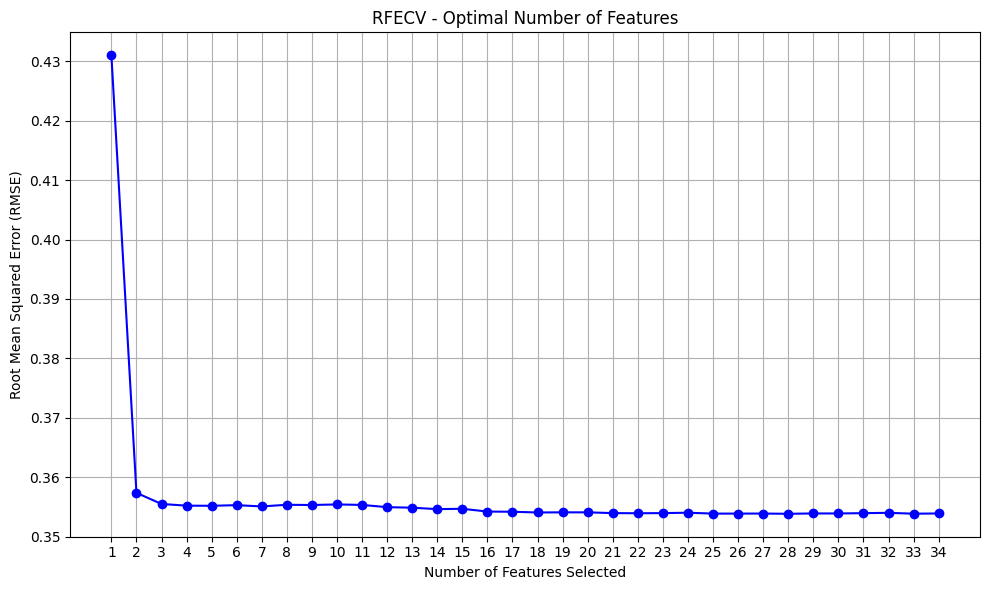

Optimal number of features: 28
Selected features: ['cat__TENURE_E 6-9 month', 'cat__TENURE_F 9-12 month', 'cat__TENURE_G 12-15 month', 'cat__TENURE_H 15-18 month', 'cat__TENURE_I 18-21 month', 'cat__TENURE_J 21-24 month', 'cat__TENURE_K > 24 month', 'cat__REGION_FATICK', 'cat__REGION_KAFFRINE', 'cat__REGION_KAOLACK', 'cat__REGION_KEDOUGOU', 'cat__REGION_KOLDA', 'cat__REGION_LOUGA', 'cat__REGION_MATAM', 'cat__REGION_SAINT-LOUIS', 'cat__REGION_THIES', 'cat__REGION_Unknown', 'cat__REGION_ZIGUINCHOR', 'num__MONTANT', 'num__FREQUENCE_RECH', 'num__FREQUENCE', 'num__ON_NET', 'num__ORANGE', 'num__TIGO', 'num__ZONE2', 'num__REGULARITY', 'num__FREQ_TOP_PACK', 'remainder__DATA_VOLUME_NA']
RMSE at optimal number of features: 0.35


In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

if not isinstance(X_train, pd.DataFrame):
    feature_names = prep_pipeline.get_feature_names_out()
    X_train = pd.DataFrame(X_train, columns=feature_names)
    X_test = pd.DataFrame(X_test, columns=feature_names)

rfecv = RFECV(
    estimator=LogisticRegression(max_iter=1000, random_state=42),
    scoring='neg_root_mean_squared_error',
    cv=5
)

rfecv.fit(X_train, y_train)

optimal_num_features = rfecv.n_features_
selected_features = X_train.columns[rfecv.support_]
rmses = -rfecv.cv_results_['mean_test_score']
n_features = rfecv.cv_results_['n_features']

plt.figure(figsize=(10, 6))
plt.plot(n_features, rmses, marker='o', linestyle='-', color='b')
plt.title("RFECV - Optimal Number of Features")
plt.xlabel("Number of Features Selected")
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.grid(True)
plt.xticks(n_features)
plt.tight_layout()
plt.show()

optimal_rmse = rmses[np.where(n_features == optimal_num_features)[0][0]]
print(f"Optimal number of features: {optimal_num_features}")
print(f"Selected features: {list(selected_features)}")
print(f"RMSE at optimal number of features: {optimal_rmse:.2f}")

RFE identified 28 features as optimal, which accounts for most of the features in our dataset. This outcome indicates that RFE struggled to narrow down a smaller, more focused subset of features that meaningfully contribute to the target variable. Furthermore, because RFE considers feature interactions and many features in our dataset are correlated (as highlighted in the heatmap), it likely retained multiple redundant features. These redundant features may have been retained because their collective removal did not significantly impact model performance, leading to an inefficient selection process.

### 3. Backward Sequential Feature Selection

Feature combination (1, 2, 6, 7, 9, 10, 12, 15, 17, 18, 19, 22, 23, 24, 26, 27, 29, 30, 31, 32, 33) gave best RMSE of 0.



,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
34,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[-0.35774978997869217, -0.35506327043485664, -...",-0.35391,"(cat__TENURE_E 6-9 month, cat__TENURE_F 9-12 m...",0.003059,0.00238,0.00119
33,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[-0.35783088479781805, -0.3549406727663225, -0...",-0.353844,"(cat__TENURE_E 6-9 month, cat__TENURE_F 9-12 m...",0.003188,0.00248,0.00124
32,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[-0.3576686767728024, -0.35506327043485664, -0...",-0.353787,"(cat__TENURE_E 6-9 month, cat__TENURE_F 9-12 m...",0.003208,0.002496,0.001248
31,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[-0.3574252267093559, -0.3549406727663225, -0....",-0.353722,"(cat__TENURE_E 6-9 month, cat__TENURE_F 9-12 m...",0.003058,0.002379,0.001189
30,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 15,...","[-0.3574252267093559, -0.3549815433603628, -0....",-0.353705,"(cat__TENURE_E 6-9 month, cat__TENURE_F 9-12 m...",0.003107,0.002417,0.001209
29,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 15,...","[-0.3576281132709115, -0.3549815433603628, -0....",-0.353754,"(cat__TENURE_E 6-9 month, cat__TENURE_F 9-12 m...",0.003173,0.002469,0.001234
28,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 15,...","[-0.35774978997869217, -0.3549815433603628, -0...",-0.353745,"(cat__TENURE_E 6-9 month, cat__TENURE_F 9-12 m...",0.003313,0.002578,0.001289
27,"(0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 15, 17...","[-0.35774978997869217, -0.35506327043485664, -...",-0.353728,"(cat__TENURE_E 6-9 month, cat__TENURE_F 9-12 m...",0.003337,0.002596,0.001298
26,"(0, 1, 2, 3, 5, 6, 7, 9, 10, 12, 13, 15, 17, 1...","[-0.35774978997869217, -0.3546953503045067, -0...",-0.353713,"(cat__TENURE_E 6-9 month, cat__TENURE_F 9-12 m...",0.003207,0.002496,0.001248
25,"(0, 1, 2, 3, 6, 7, 9, 10, 12, 13, 15, 17, 18, ...","[-0.3576281132709115, -0.35510412691855836, -0...",-0.353712,"(cat__TENURE_E 6-9 month, cat__TENURE_F 9-12 m...",0.003272,0.002546,0.001273


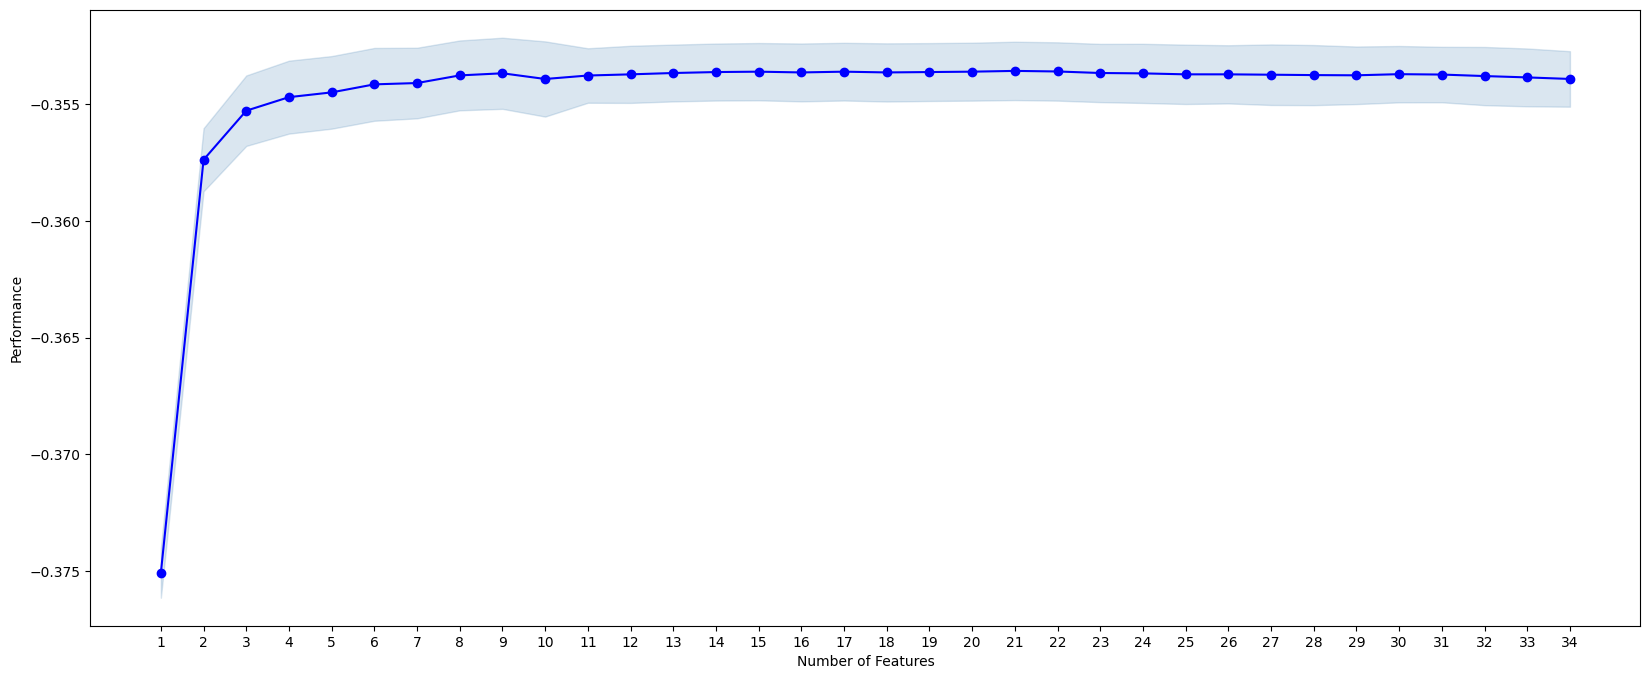

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

model = LogisticRegression(max_iter=100, solver='lbfgs')

sbs = SequentialFeatureSelector(model,
          forward=False,
          k_features='best',
          scoring='neg_root_mean_squared_error')
sbs.fit(X_train, y_train)


print(f'Feature combination {sbs.k_feature_idx_} gave best RMSE of {-sbs.k_score_:.0f}.\n')

metric_df = pd.DataFrame.from_dict(sbs.get_metric_dict()).T
display(metric_df)

plot_sfs(sbs.get_metric_dict(), kind='std_err', figsize=(20, 8))
plt.show()

selected_indices = list(sbs.k_feature_idx_)
selected_features = X_train.columns[selected_indices]


Backward Feature Selection identified 31 features (out of 34) as optimal, retaining nearly the entire feature set.
This suggests the method struggled to eliminate irrelevant or redundant features. Therefore, the method did not achieve the goal of simplifying the model. Backward selection evaluates feature subsets based on their collective contribution to model performance. When correlated features exist, the method may retain multiple redundant features, as their removal individually does not degrade performance significantly.